In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

plt.style.use('seaborn') # 시각화 스타일 설정
import warnings
warnings.simplefilter("ignore") # 경고 무시


In [3]:
# 훈련 및 테스트 데이터 가져오기
train = pd.read_csv('./airline_dataset/train.csv')
test = pd.read_csv('./airline_dataset/test.csv')
sample_submission = pd.read_csv('./airline_dataset/sample_submission.csv')

In [4]:
# pandas의 메서드로 head()는 앞 5줄 정보만 간략히 보여줌
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,...,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,...,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,...,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,...,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,...,4,4,4,4,4,4,5,0,0.0,1


In [6]:
# 데이터 분석하기 
train.shape, test.shape

((3000, 24), (2000, 23))

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 2000 non-null   int64  
 1   Gender                             2000 non-null   object 
 2   Customer Type                      2000 non-null   object 
 3   Age                                2000 non-null   int64  
 4   Type of Travel                     2000 non-null   object 
 5   Class                              2000 non-null   object 
 6   Flight Distance                    2000 non-null   int64  
 7   Seat comfort                       2000 non-null   int64  
 8   Departure/Arrival time convenient  2000 non-null   int64  
 9   Food and drink                     2000 non-null   int64  
 10  Gate location                      2000 non-null   int64  
 11  Inflight wifi service              2000 non-null   int64

<AxesSubplot:>

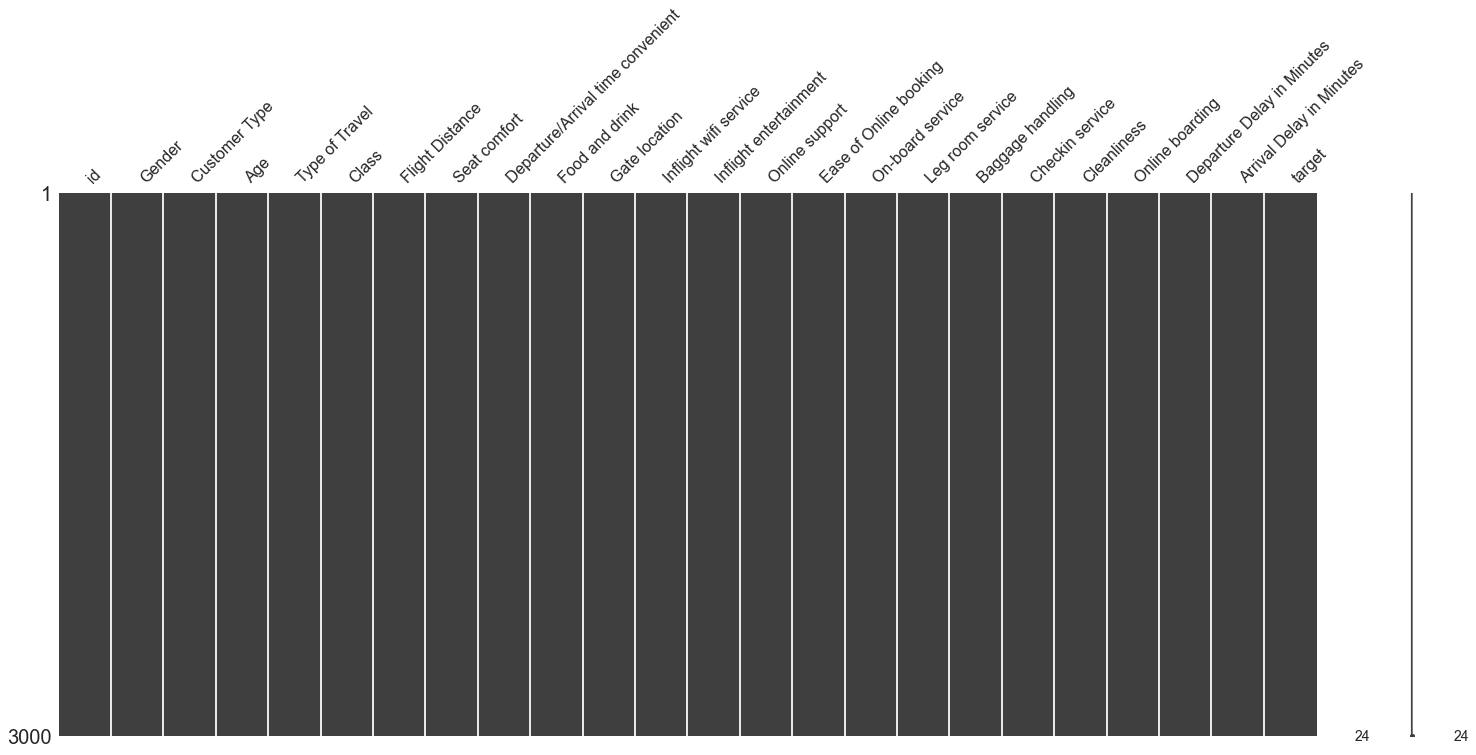

In [8]:
import missingno as msno
# 결측값 갯수를 시각적으로 표현
msno.matrix(train)

In [9]:
# 결측값만 확인
train.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
target                               0
dtype: int64

In [10]:
train.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,39.203000,1983.079333,2.863333,3.009667,2.874333,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.370000,3.728667,3.356333,15.634333,15.922000,0.556000
std,866.169729,15.108802,1028.109117,1.394981,1.519543,1.431511,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,1.258158,1.161678,1.294057,45.083228,45.203411,0.496937
min,1.000000,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,750.750000,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1500.500000,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,2250.250000,51.000000,2547.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,3000.000000,80.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


In [11]:
# Euclidean Data Analysis(EDA) 탐색적 데이터 분석
# id 컬럼 드랍.
train.drop(['id'], axis=1, inplace=True)
test.drop(['id'], axis=1, inplace=True)



In [12]:
cat_cols = train.select_dtypes(include='object').columns.to_list()
num_cols = train.select_dtypes(exclude='object').columns.to_list()
# 리스트 내 원소 제거하기
num_cols.remove('target')

In [13]:
num_cols

['Age',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

<AxesSubplot:xlabel='target', ylabel='count'>

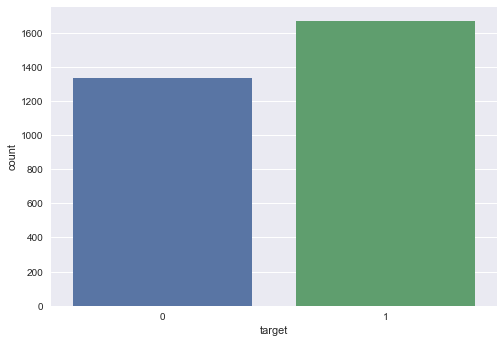

In [14]:
sns.countplot(train['target'])

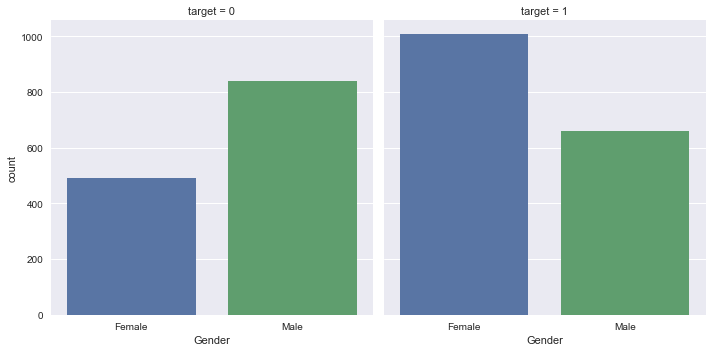

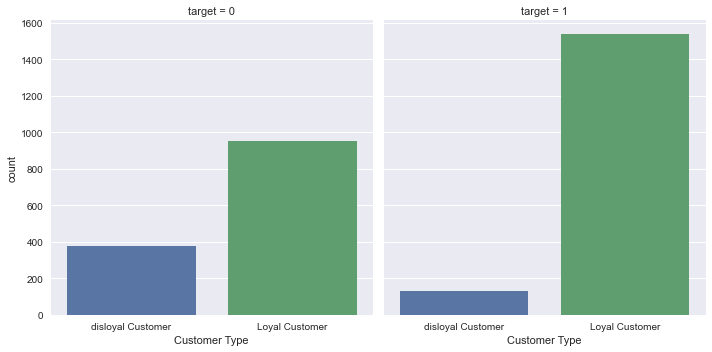

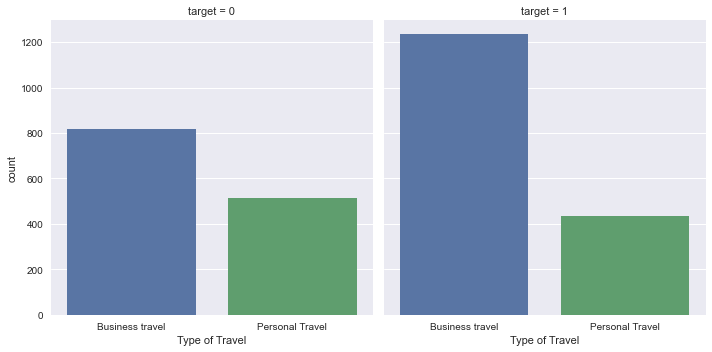

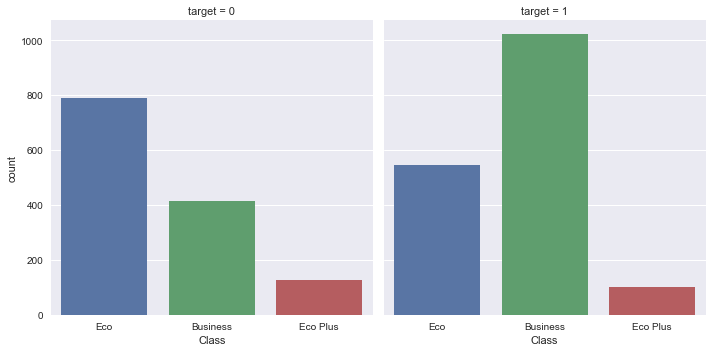

In [16]:
# Observation
def show_cat_plot(df, columns):
    for column in columns:
        sns.catplot(x=column, col='target',data=df, kind='count')
        plt.show()
        
show_cat_plot(train, cat_cols)

[ Age ]


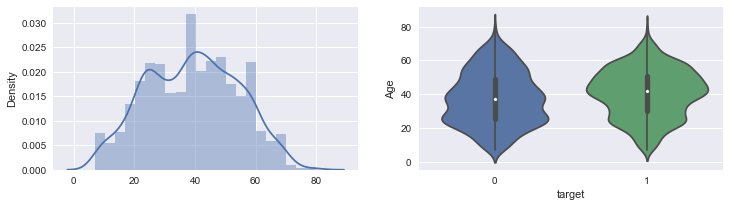

[ Flight Distance ]


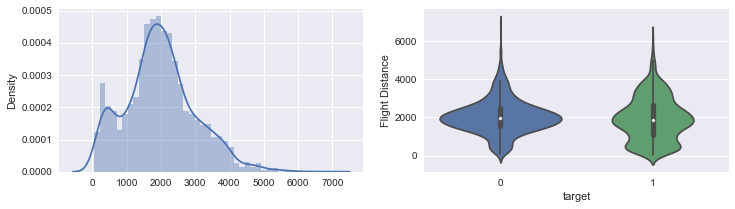

[ Seat comfort ]


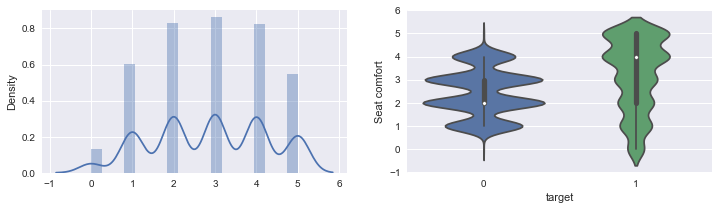

[ Departure/Arrival time convenient ]


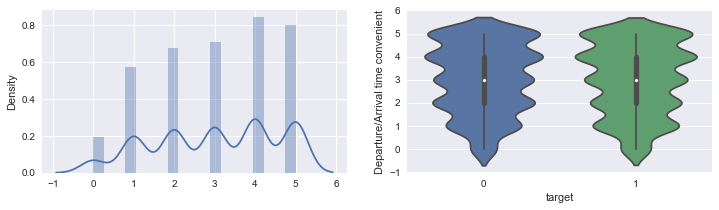

[ Food and drink ]


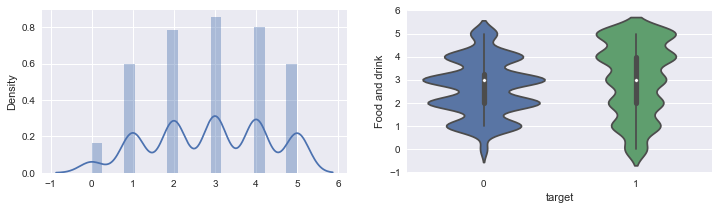

[ Gate location ]


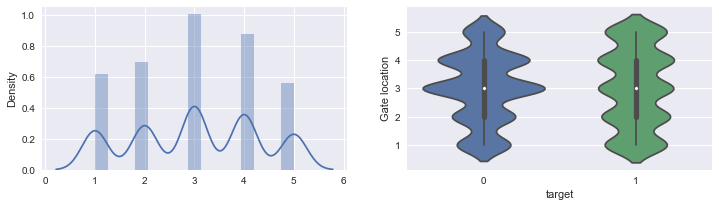

[ Inflight wifi service ]


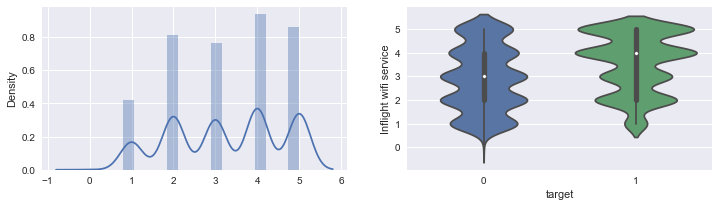

[ Inflight entertainment ]


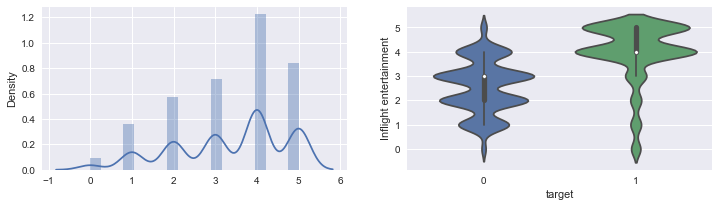

[ Online support ]


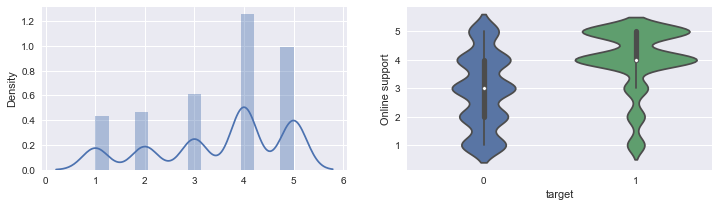

[ Ease of Online booking ]


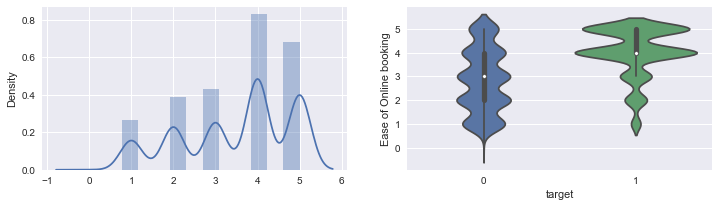

[ On-board service ]


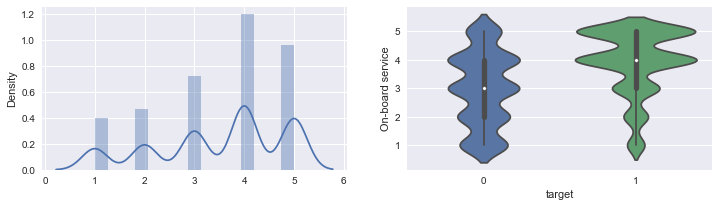

[ Leg room service ]


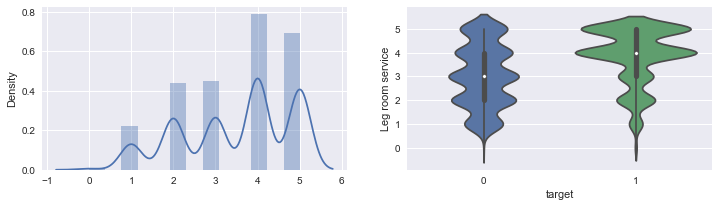

[ Baggage handling ]


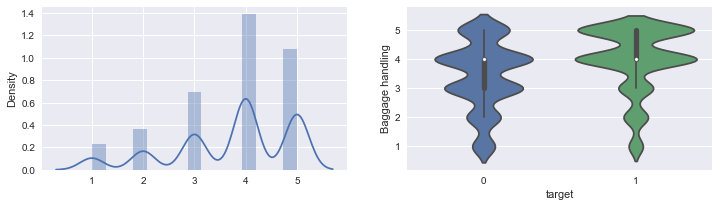

[ Checkin service ]


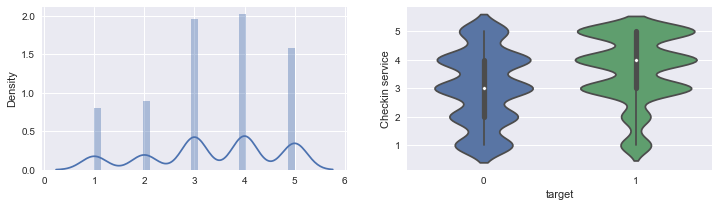

[ Cleanliness ]


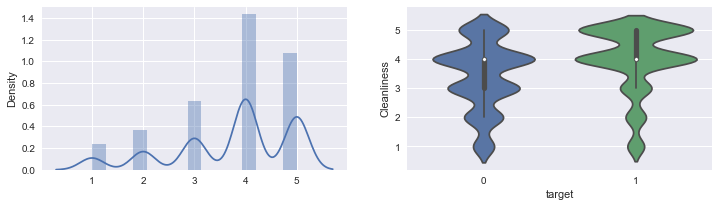

[ Online boarding ]


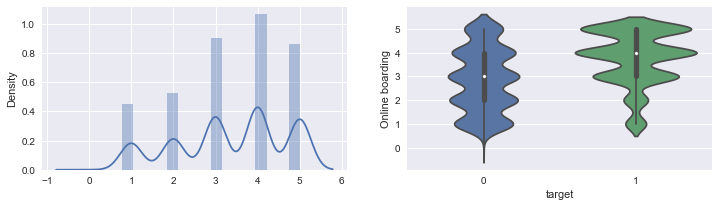

[ Departure Delay in Minutes ]


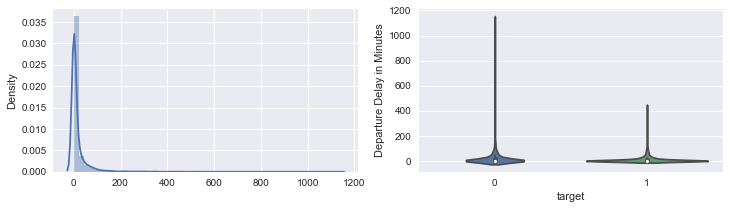

[ Arrival Delay in Minutes ]


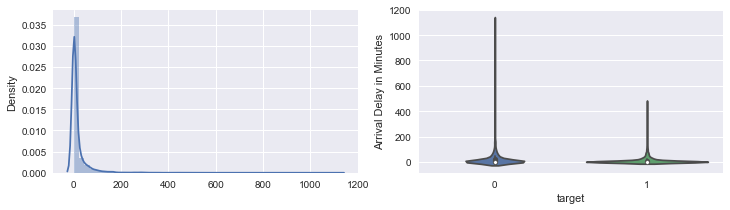

In [18]:
def show_dist_plot(df, columns):
    for column in columns:
        print('[',column,']')
        f, ax = plt.subplots(1, 2, figsize=(12, 3))
        sns.distplot(x=df[column], ax = ax[0])
        sns.violinplot(x=df['target'], y=df[column], ax = ax[1])
        plt.show()
show_dist_plot(train, num_cols)

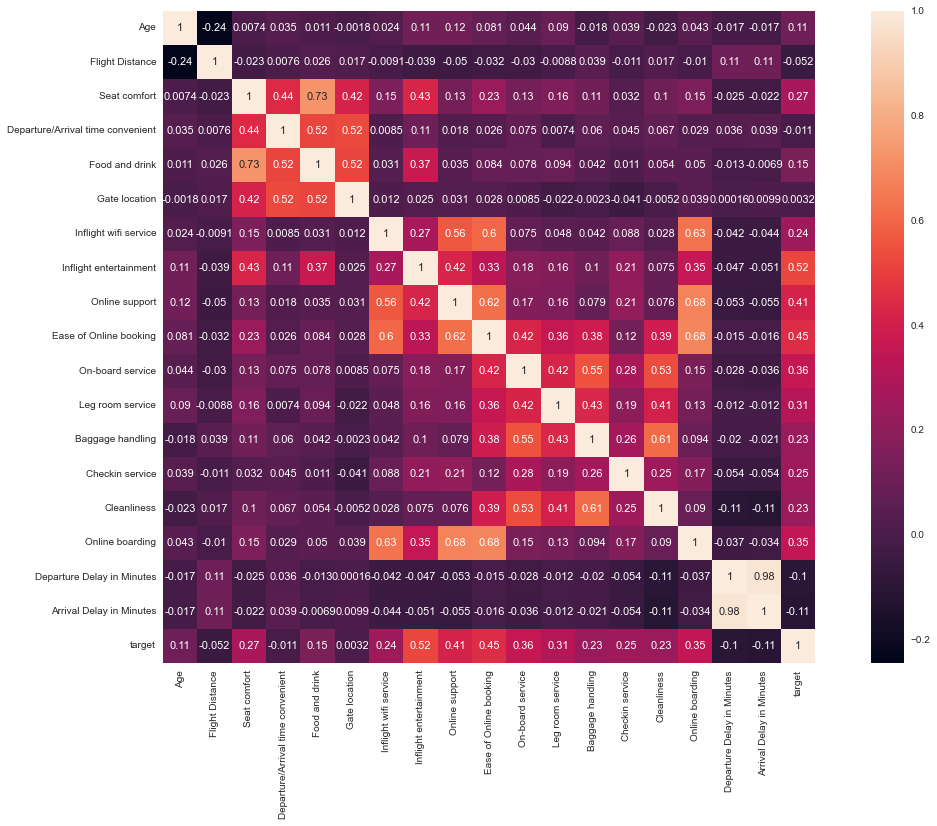

In [19]:
plt.figure(figsize=(20, 12))
sns.heatmap(train.corr(), annot=True, annot_kws={'size':11}, square=True);

In [20]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)


In [21]:
train['Flight Distancs'] = np.log1p(train['Flight Distance'])
train['Departure Delay in Minutes'] = np.log1p(train['Departure Delay in Minutes'])
train['Arrival Delay in Minutes'] = np.log1p(train['Arrival Delay in Minutes'])

test['Flight Distance'] = np.log1p(test['Flight Distance'])
test['Departure Delay in Minutes'] = np.log1p(test['Departure Delay in Minutes'])
test['Arrival Delay in Minutes'] = np.log1p(test['Arrival Delay in Minutes'])


In [22]:
# Normalization
from sklearn.preprocessing import StandardScaler

for i in train[num_cols]:
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train[num_cols])
    train[num_cols] = pd.DataFrame(data=train_scaled, columns=num_cols)
    test_scaled = scaler.transform(test[num_cols])
    test[num_cols] = pd.DataFrame(data=test_scaled, columns=num_cols)    

In [25]:
from pycaret.classification import *
exp_101 = setup(data=train, target='target', session_id=123, fold_shuffle=True)

ModuleNotFoundError: No module named 'pycaret'